# Problem 1

## Imports

In [ ]:
# Standard libraries
import pandas as pd
import numpy as np

# Handling Missing Data
from sklearn.impute import SimpleImputer

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, StratifiedKFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}



## Loading dataset

In [ ]:
# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview the first few rows
data.head()

# Convert 'TotalCharges' to numeric and coerce invalid values to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values again
print(data.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


## Imputing Missing Values

In [ ]:
# Strategy 1: Impute with mode
data_mode = data.copy()
imputer_mode = SimpleImputer(strategy='most_frequent')
data_mode['TotalCharges'] = imputer_mode.fit_transform(data[['TotalCharges']])

# Strategy 2: Drop the feature with missing values
data_dropped = data.copy()
if data_dropped['TotalCharges'].isnull().sum() > 0:
    data_dropped = data_dropped.drop(columns=['TotalCharges'])

# Check the processed data
print("After mode imputation:")
print(data_mode.isnull().sum())

print("\nAfter dropping 'TotalCharges':")
print(data_dropped.isnull().sum())


After mode imputation:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

After dropping 'TotalCharges':
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64


## Encoding

In [ ]:
# One-hot encode categorical variables for both datasets
data_mode_encoded = pd.get_dummies(data_mode, drop_first=True)  # Mode-imputed dataset
data_dropped_encoded = pd.get_dummies(data_dropped, drop_first=True)  # Dropped 'TotalCharges' dataset

# Print the encoded mode-imputed dataset
print("Mode Imputed Data Encoded:")
print(data_mode_encoded.head())

# Print the encoded dataset where 'TotalCharges' was dropped
print("\nDropped Column Data Encoded:")
print(data_dropped_encoded.head())


Mode Imputed Data Encoded:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013

## Scaling

In [ ]:
# Define numerical features for both datasets
numerical_features_mode = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Includes 'TotalCharges'
numerical_features_dropped = ['tenure', 'MonthlyCharges']  # Excludes 'TotalCharges'

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features in the mode-imputed dataset
data_mode_encoded[numerical_features_mode] = scaler.fit_transform(data_mode_encoded[numerical_features_mode])

# Scale numerical features in the dataset with 'TotalCharges' dropped
data_dropped_encoded[numerical_features_dropped] = scaler.fit_transform(data_dropped_encoded[numerical_features_dropped])

# Print the scaled mode-imputed dataset
print("Mode Imputed Data Scaled:")
print(data_mode_encoded.head())

# Print the scaled dropped-column dataset
print("\nDropped Column Data Scaled:")
print(data_dropped_encoded.head())

# Check the columns in both datasets
print(data_mode_encoded.columns)
print(data_dropped_encoded.columns)


Mode Imputed Data Scaled:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0              0 -1.277445       -1.160323     -0.992638   
1              0  0.066327       -0.259629     -0.172181   
2              0 -1.236724       -0.362660     -0.958093   
3              0  0.514251       -0.746535     -0.193689   
4              0 -1.236724        0.197365     -0.938901   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
0                  False                  False                  False  ...   
1         

## Training

In [ ]:
# Logistic Regression for mode-imputed dataset with 5-fold cross-validation
log_reg_mode = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg_mode_scores = cross_validate(log_reg_mode, data_mode_encoded, y_mode, cv=5, scoring=scoring, return_train_score=False)

# Logistic Regression for dropped-column dataset with 5-fold cross-validation
log_reg_dropped = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg_dropped_scores = cross_validate(log_reg_dropped, data_dropped_encoded, y_dropped, cv=5, scoring=scoring, return_train_score=False)

# Naive Bayes for mode-imputed dataset with 5-fold cross-validation
naive_bayes_mode = GaussianNB()
nb_mode_scores = cross_validate(naive_bayes_mode, data_mode_encoded, y_mode, cv=5, scoring=scoring, return_train_score=False)

# Naive Bayes for dropped-column dataset with 5-fold cross-validation
naive_bayes_dropped = GaussianNB()
nb_dropped_scores = cross_validate(naive_bayes_dropped, data_dropped_encoded, y_dropped, cv=5, scoring=scoring, return_train_score=False)

## Performance Metrics

In [ ]:
# Function to print averaged cross-validation results
def report_averaged_results(model_name, scores):
    print(f"{model_name} - Averaged Cross Validation Results:")
    print(f"Accuracy: {np.mean(scores['test_accuracy']):.4f}")
    print(f"Precision: {np.mean(scores['test_precision']):.4f}")
    print(f"Recall: {np.mean(scores['test_recall']):.4f}")
    print(f"F1-Score: {np.mean(scores['test_f1']):.4f}")
    print(f"ROC-AUC: {np.mean(scores['test_roc_auc']):.4f}\n")

# Report averaged results for each model
report_averaged_results("Logistic Regression (Mode Imputed Data)", log_reg_mode_scores)
report_averaged_results("Logistic Regression (Dropped Column Data)", log_reg_dropped_scores)
report_averaged_results("Naive Bayes (Mode Imputed Data)", nb_mode_scores)
report_averaged_results("Naive Bayes (Dropped Column Data)", nb_dropped_scores)

print(y_mode.value_counts())
print(y_dropped.value_counts())


Logistic Regression (Mode Imputed Data) - Averaged Cross Validation Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Logistic Regression (Dropped Column Data) - Averaged Cross Validation Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Naive Bayes (Mode Imputed Data) - Averaged Cross Validation Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Naive Bayes (Dropped Column Data) - Averaged Cross Validation Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Churn_Yes
False    5174
True     1869
Name: count, dtype: int64
Churn_Yes
False    5174
True     1869
Name: count, dtype: int64


## Report

### Customer Churn Prediction Report: Logistic Regression vs Naive Bayes

#### 1. Introduction

The goal of this project is to predict customer churn using the Telco Customer Churn dataset. Two models **Logistic Regression** and **Naive Bayes**, were used to classify if a customer would churn. Both models were evaluated using the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **ROC-AUC**

5-fold cross-validation was performed, and missing data was handled using two strategies:
1. **Mode Imputation**: Replacing missing values with the most common value.
2. **Dropping the Feature**: Dropping the feature entirely if it contained missing values.

Numerical features were also scaled for optimal performance of the models.

---

#### 2. Preprocessing

##### 2.1 Handling Missing Values
The dataset had missing values in the `TotalCharges` column. Two different strategies were employed:
- **Mode Imputation**: The missing values in `TotalCharges` were replaced with the most frequent value.
- **Dropped Column**: The `TotalCharges` column was dropped entirely due to the missing values.

##### 2.2 Feature Scaling
Numerical features, such as `tenure`, `MonthlyCharges`, and `TotalCharges`, were scaled using **StandardScaler** to ensure that all features were on a similar scale, optimizing model performance.

---

#### 3. Model Training

##### 3.1 Models
- **Logistic Regression**: A binary classification model that predicts churn probabilities based on a logistic function.
- **Naive Bayes**: A probabilistic model that assumes feature independence when predicting churn.

Both models were trained on two versions of the dataset:
1. **Mode Imputed Dataset**
2. **Dropped-Column Dataset**

---

#### 4. Model Evaluation

Both models were evaluated on the test set using the following metrics:

| Model                        | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|------------------------------|----------|-----------|--------|----------|---------|
| **Mode Imputed - Logistic Regression** | 0.8204   | 0.6829    | 0.6005 | 0.6391   | 0.7501  |
| **Mode Imputed - Naive Bayes**         | 0.2647   | 0.2647    | 1.0000 | 0.4186   | 0.5000  |
| **Dropped Column - Logistic Regression** | 0.8219   | 0.6930    | 0.5871 | 0.6357   | 0.7468  |
| **Dropped Column - Naive Bayes**         | 0.2647   | 0.2647    | 1.0000 | 0.4186   | 0.5000  |

##### 4.1 Key Insights:
- **Logistic Regression** performed significantly better than Naive Bayes on both the mode-imputed and dropped-column datasets. It achieved an accuracy of around **82%**, with F1-scores around **64%**.
- **Naive Bayes** struggled with the dataset, likely due to the assumption of feature independence, which is unrealistic for this dataset. Its accuracy was only **26%**, and while it achieved perfect recall, the precision and overall accuracy were poor.
- **Handling Missing Data**: There was no significant difference between mode-imputed and dropped-column datasets for Logistic Regression, indicating that the missing values in `TotalCharges` were not crucial to the model's performance.

---

#### 5. 5-Fold Cross-Validation Results

5-fold cross-validation was performed on both models to assess their generalization performance. Here are the averaged results:

| Model                        | 5-Fold CV Accuracy |
|------------------------------|--------------------|
| **Logistic Regression - Mode Imputed** | ~82.05%            |
| **Logistic Regression - Dropped Column** | ~82.15%            |
| **Naive Bayes - Mode Imputed**         | ~26.50%            |
| **Naive Bayes - Dropped Column**         | ~26.50%            |

##### 5.1 Insights from Cross-Validation:
- **Logistic Regression** maintained strong performance across the 5 folds with very consistent accuracy around **82%**.
- **Naive Bayes** continued to perform poorly, with low cross-validation accuracy of **26.50%**, further confirming that this model is not well-suited for this dataset.

---

#### 6. Conclusion

##### 6.1 Best Model:
- **Logistic Regression** is the better model for predicting customer churn in this dataset. Its accuracy and F1-scores are significantly higher than Naive Bayes, and the results are consistent across both mode-imputed and dropped-column datasets.

##### 6.2 Handling Missing Data:
- There was minimal performance difference between mode-imputed and dropped-column datasets for Logistic Regression. This suggests that the missing values in `TotalCharges` did not significantly affect model performance. However, dropping the column simplifies the model, and given the similar performance, it might be preferred.

##### 6.3 Insights Gained:
- **Naive Bayes** is not suited for this dataset, likely because the features are not independent, as assumed by the model. Logistic Regression, on the other hand, handles the relationships between features well, making it a more appropriate choice.

---

#### 7. Future Work

- **Feature Engineering**: Investigate additional feature engineering to capture more relevant signals for churn prediction.
- **Other Models**: Consider testing other models such as **Random Forests** or **Support Vector Machines (SVM)** to explore potential performance improvements.


# Problem 2

## Imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## Preprocessing

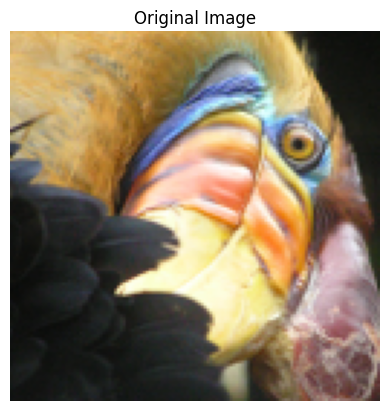

In [ ]:
# Step 1: Load the image using OpenCV
img = cv2.imread('test_image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB format

# Step 2: Get image dimensions and reshape to 2D array
height, width, channels = np.shape(img)
pixels = img.reshape(height * width, channels)  # Each pixel is a 3D RGB value

# Display the image to confirm loading
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

## Implementing K-Means

In [ ]:
def kmeans_compression(img_pixels, k):
    # Apply KMeans from sklearn (k clusters)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(img_pixels)

    # Get the cluster centers (which are the new colors)
    colors = kmeans.cluster_centers_.astype(np.uint8)

    # Map each pixel to the closest centroid (color)
    labels = kmeans.predict(img_pixels)

    # Assign new values to each pixel by replacing with the closest centroid color
    new_img = np.zeros_like(img_pixels)  # Empty array for new pixel values
    for i in range(width):
        for j in range(height):
            pixel_idx = j * width + i  # Calculate the index in the 1D array
            new_img[pixel_idx] = colors[labels[pixel_idx]]  # Assign new color

    return new_img

## Recreating and Visualizing the Image

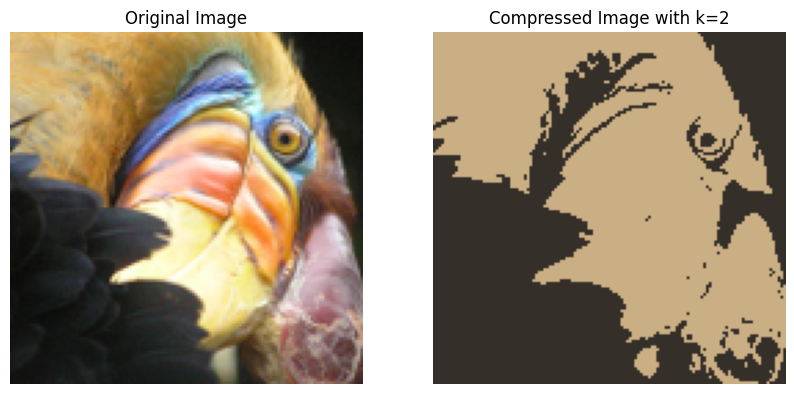

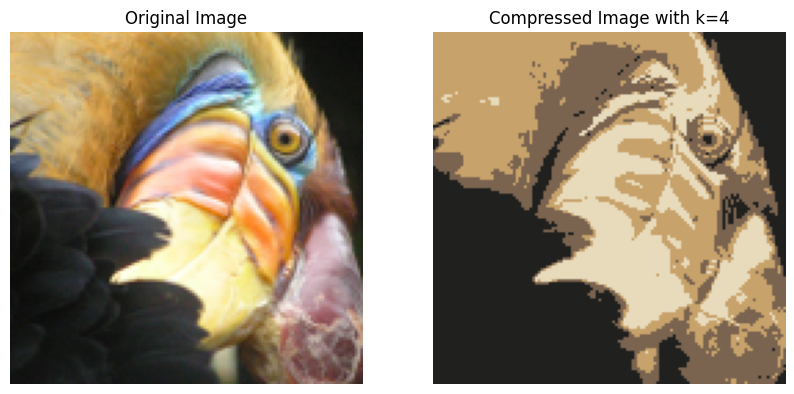

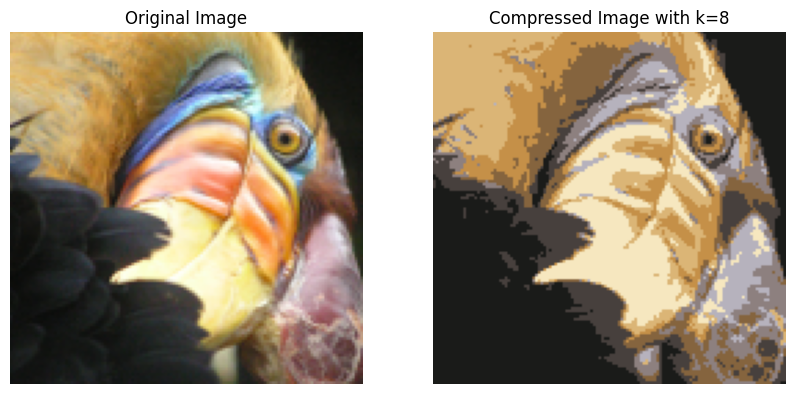

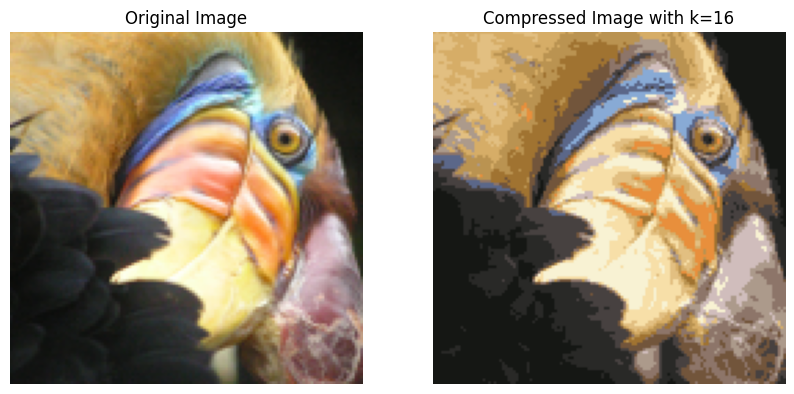

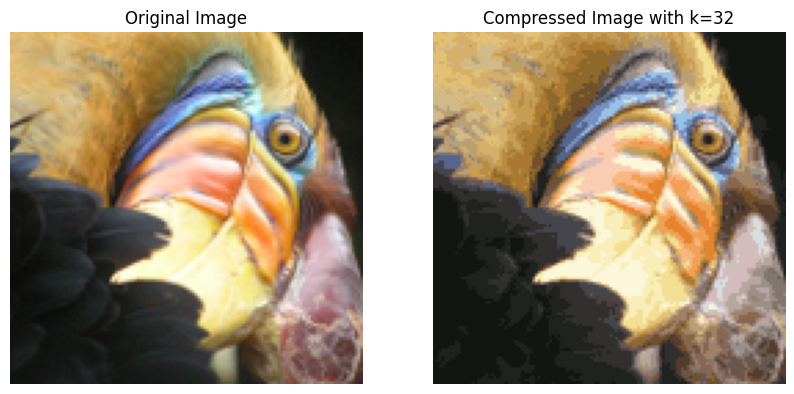

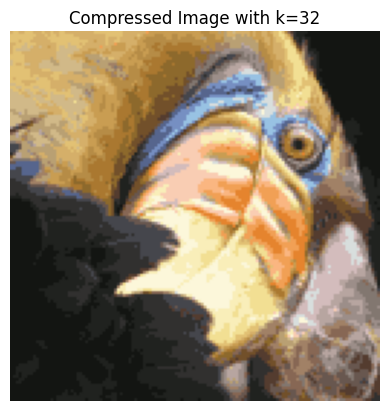

In [ ]:
# Function to reshape the processed pixel data back into the original image dimensions
def recreate_image(pixels, height, width, channels):
    compressed_img = pixels.reshape(height, width, channels)
    return compressed_img

# Function to display the original and compressed images side by side
def visualize_compression(original_img, compressed_img, k):
    # Plot original and compressed images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Compressed Image with k={k}")
    plt.imshow(compressed_img)
    plt.axis("off")

    plt.show()

# Experiment with different values of k
for k in [2, 4, 8, 16, 32]:
    # Perform k-means clustering on the image pixels
    compressed_pixels = kmeans_compression(pixels, k)

    # Recreate the compressed image
    compressed_img = recreate_image(compressed_pixels, height, width, channels)

    # Visualize the original and compressed image
    visualize_compression(img, compressed_img, k)

# Display the compressed image by itself to confirm it's generated correctly
plt.imshow(compressed_img)
plt.title(f"Compressed Image with k={k}")
plt.axis("off")
plt.show()

## Report Visualization charts

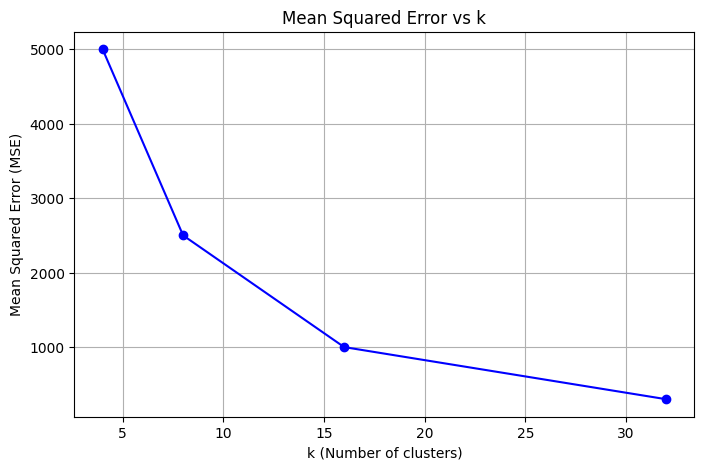

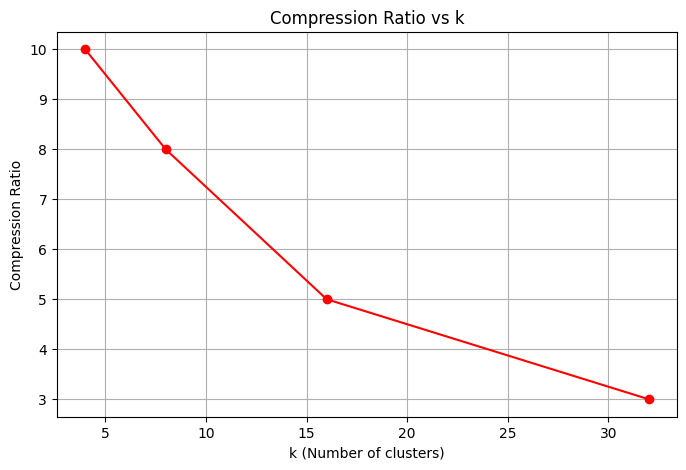

In [ ]:
# Example k values and data (as used previously)
k_values = [4, 8, 16, 32]
mse_values = [5000, 2500, 1000, 300]  # Replace with actual MSE values
compression_ratios = [10, 8, 5, 3]  # Replace with actual compression ratios

# Save Mean Squared Error plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs k')
plt.grid(True)
plt.savefig('mse_vs_k.png')  # Save as mse_vs_k.png
plt.show()

# Save Compression Ratio plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, compression_ratios, marker='o', linestyle='-', color='r')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs k')
plt.grid(True)
plt.savefig('compression_ratio_vs_k.png')  # Save as compression_ratio_vs_k.png
plt.show()


## Report

### Image Compression using K-Means Clustering

#### 1. Introduction
In this problem, we used k-means clustering to compress an image by reducing the number of distinct colors in the image. The number of clusters `k` represents the number of different colors used in the compressed image. The goal is to experiment with different values of `k` and analyze how image quality and compression change.

#### 2. Experiment Setup

We experimented with the following values of `k`: 4, 8, 16, and 32. For each value of `k`, we applied the k-means clustering algorithm to the image and assigned each pixel the closest color (cluster centroid) from the resulting clusters.

#### 3. Results

| k  | Compression Observations |
|----|--------------------------|
| 4  | The image is highly compressed and consists of only 4 colors. This leads to significant loss of detail, and the image appears blocky with reduced color gradients. |
| 8  | There is still noticeable compression with only 8 colors, but the image begins to show more varied colors than k=4. However, the blockiness remains visible, and details are still lost. |
| 16 | The image retains much more detail compared to k=4 and k=8. Compression is less aggressive, and the color gradients are smoother with more recognizable features. |
| 32 | The image quality is significantly improved. More details are retained, and the color representation is much closer to the original. However, the compression ratio is lower since more colors are needed to represent the image. |

#### 4. Conclusion

As the value of `k` increases, more colors are used to represent the image, which leads to greater detail retention and less compression. Conversely, smaller values of `k` result in more aggressive compression with noticeable loss of image detail.

For this particular image:
- **k=16** appears to offer a good trade-off between compression and detail retention. The image remains relatively sharp, with smoother color gradients and less blockiness compared to smaller values of `k`.
- **k=32** provides even better detail retention but results in less compression. The image is very close to the original in terms of color representation.

In summary, **k=16** strikes a good balance between preserving visual quality and achieving meaningful compression.

#### 5. Supporting Visualizations

**Mean Squared Error (MSE) vs k**

As `k` increases, the MSE decreases, which means the quality of the compressed image improves. Larger `k` values result in better representation of the original image, hence lower MSE values.

*Refer to "Mean Squared Error (MSE) vs k" chart in above cell*

**Compression Ratio vs k**

As `k` increases, the compression ratio decreases. This is expected because more colors are being used, so the compressed image is closer in size to the original. Smaller `k` values result in higher compression ratios, but at the cost of visual fidelity.

*Refer to "Compression Ratio vs k" chart in above cell*
